Project: Investigate the Patient Medical Appointment Database in Brazil for May 2016
Table of content
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions

1. Introduction: This is a dataset that contains details of patients scheduled for a medical appointments. In this analysis, I intend to investigate why a patient is likely not to show up for their appointment based on the following reasons:
i. If or not they are on Scholarship which means they are enrolled in the Brazillian welfer program.
ii. If or not the patient is handicaped.
iii. If or not they received a reminder via sms.
iv. Age of the patient.
v. Location of the patient.
iv. The day of the week, the appoitment was.

QUESTIONS ANSWERED IN THIS ANALYSIS INCLUDE:
1. Is the Scholarship status of a patient likely to affect whether or not they show up for their appointment.

2. Does being handicapped have an effect on whether a patient will attend their appoitment or miss it?.

3. Does receiving an sms reminder notification affect whether or not a patient will show up for their appoitment?

4. Does age have any bearing as to whether or not a patient show up for their appoitment?

5. Does the location of a patient have any bearing on whether or not they show up for their appoitment?

6. Does the day of appoitment have any impact on whether or not the patient show up for their medical appointment?

In [217]:
#Importing all packages I intend to use:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline

In [218]:
# Reading the database

# load the dataset
df_patient = pd.read_csv('C:/Users/doote/Downloads/noshowappointments.csv')

2. Data Wrangling: At this stage, I will explore the data to understand it better and also to fix any possible issues such as missing values, wrong data types, etc.

In [219]:
# Getting an over view of the dataset

df_patient

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [220]:
# Examining the data set for duplicates

df_patient.duplicated().sum()


0

In [221]:
# Examining the data set for missing values
df_patient.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [222]:
# Examining the dataset for number of unique entries
df_patient['Neighbourhood'].nunique()

81

In [223]:
# Let us find out the data types for each column

df_patient.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [224]:
# Change the Handcap column name to Handicaped

df_patient.rename(columns = {'Handcap': 'Handicaped'}, inplace = True)

Defining Useful Functions

In [225]:
# defining a plot function to be used to plot my charts
def Pie_chart_plot_1():
    return df_patient['SMS_received'].value_counts().plot(kind='pie', autopct='%.0f%%', title = 'SMS - Reminders')

In [226]:
def Pie_chart_plot_2():
    return group_neighbour_largest.plot(x='Neighbourhood', y='countin', kind = 'pie', fontsize = 10, autopct='%.0f%%', title = 'Patient Locations');


In [227]:
def Pie_chart_plot_3():
    return group_neighbour_lowest.plot(x='Neighbourhood', y='countin', kind = 'pie', fontsize = 10, autopct='%.0f%%', title = 'Patient locations');

3. Expository Data analysis: At the stage, I will be making some more indepth analysis using the infomation provided in this dataset to find answers to the questions asked above.

Let us try to find out the number of patients that showed up for their medical appointment who are enrolled in the Brazillian welfar program. This information will help know if being on a scholarship will in anyway contribute to whether or not a patient shows up for their medical appointment.

How many patients are on scholarship

In [228]:
# Bar chart showing students on scholarship who showed up
# for their appointments

df_patient['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

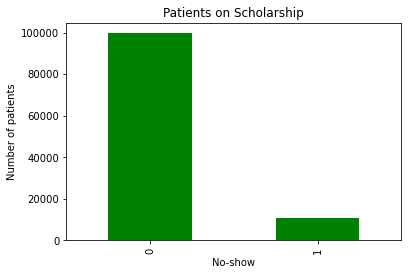

In [294]:
# A Bar Chart showing the number of patients on scholarship who showed up for their appointment

df_patient['Scholarship'].value_counts().plot(kind = 'bar', title = 'Patients on Scholarship', xlabel = 'No-show', ylabel = 'Number of patients', color = 'green');

This bar chart shows a comparison between the number of patients on scholarship who showed up for their appointments and those that did not show up

Exploring the data set to see if being handicapped affected patients showing up for their appoitment.

In [230]:
#getting an overview of the Handicaped Data
df_patient['Handicaped'].describe()

count    110527.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handicaped, dtype: float64

In [231]:
# Making sure I have the appropriate datatyp
df_patient[df_patient['Handicaped']=='3']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicaped,SMS_received,No-show


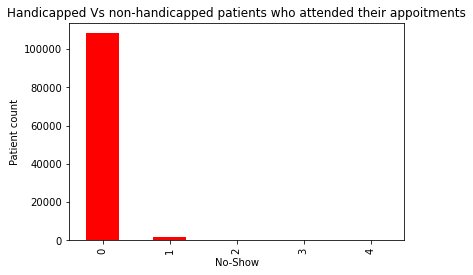

In [292]:
# A bar chart showing number of handicapped patients that showed up for their appointment

df_patient['Handicaped'].value_counts().plot(kind = 'bar', color ='red', xlabel = 'No-Show', ylabel='Patient count', title= 'Handicapped Vs non-handicapped patients who attended their appoitments');

The bar chart compares between handicapped and non handicapped Patients who attended their medical appoitments. And it can be seen that the handicapped patients showed up the most.

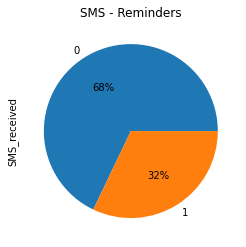

In [233]:
# a pie chart showing the percentage of patients who showed up and those that did not show up for their appoitments 
# depending on if or not they recieved an sms reminder
Pie_chart_plot_1();

This pie chart shows the percentage of patients who received sms reminders that showed up for their appoitments

In [279]:
# viewing the Age column in the patient database
df_patient['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

In [280]:
# making a count of patients who showed up and those that did not show up based on their ages.
df_patient['COUNTER'] =1       
group_age = df_patient.groupby(['Age','No-show'])['COUNTER'].sum() 
group_age

Age  No-show
0    No         2900
     Yes         639
1    No         1859
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  No            2
     Yes           3
Name: COUNTER, Length: 203, dtype: int64

In [282]:
modal_age = group_age.nlargest()

In [283]:
modal_age

Age  No-show
0    No         2900
1    No         1859
52   No         1449
56   No         1372
2    No         1366
Name: COUNTER, dtype: int64

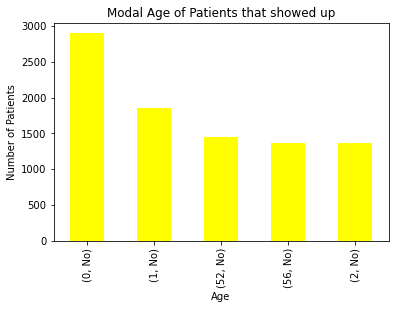

In [284]:
modal_age.plot(kind = 'bar', title = 'Modal Age of Patients that showed up', xlabel = 'Age', ylabel='Number of Patients', color = 'yellow');

This Bar chart shows the Modal age of patients that showed up for their medical appoitments.

In [290]:
least_age = group_age.nsmallest()

It is impossible to have an Age of -1, so we assume it was an entry error. We will therefore change this entry to 1 as seen below:

In [286]:
# changing the single negative age entry to a positive one
df_patient['Age'] = df_patient['Age'].replace([-1], 1)

In [287]:
# Finding out how many negative entries there are for age

negative_age = df_patient[df_patient==-1]

In [288]:
negative_age.count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicaped        0
SMS_received      0
No-show           0
COUNTER           0
dtype: int64

In [289]:

least_age

Age  No-show
96   Yes        1
98   Yes        1
99   No         1
97   Yes        2
102  No         2
Name: COUNTER, dtype: int64

In [249]:
# confirming the change of the negative value into a positive value


positive_value = df_patient[df_patient==-1]


In [250]:
positive_value.count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicaped        0
SMS_received      0
No-show           0
COUNTER           0
dtype: int64

In [ ]:
# the negative value in the age column has been handled

In [163]:
aged_patients

PatientId         11
AppointmentID     11
Gender            11
ScheduledDay      11
AppointmentDay    11
Age               11
Neighbourhood     11
Scholarship       11
Hipertension      11
Diabetes          11
Alcoholism        11
Handicaped        11
SMS_received      11
No-show           11
COUNTER           11
dtype: int64

least_age.plot(kind = 'bar', title = 'Least age that showed up', xlabel = 'Age', ylabel='Number of Patients', color = 'pink');

In [45]:
# making a count of patients who showed up and those who did not show up based on the location they live in filtered by the
# mode
countin = df_patient['COUNTER'] =1       
group_neighbour_largest = df_patient.groupby(['Neighbourhood','No-show'])['COUNTER'].sum() .nlargest()
group_neighbour_largest

Neighbourhood    No-show
JARDIM CAMBURI   No         6252
MARIA ORTIZ      No         4586
RESISTÊNCIA      No         3525
JARDIM DA PENHA  No         3246
SANTA MARTHA     No         2635
Name: COUNTER, dtype: int64

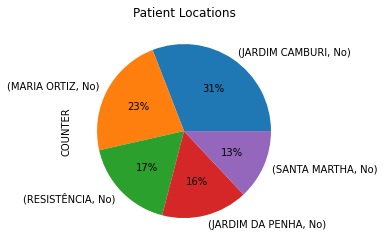

In [97]:
# pie chart showing the percentage of patients that showed up and those that did not show up based on their locations.

Pie_chart_plot_2();


This pie chart shows the Locations from which patients showed up the most for their appointments.

In [47]:
# making a count of patients who showed up and those who did not show up based on the location they live in filtered by the
# least - show ups

countin = df_patient['COUNTER'] =1       
group_neighbour_lowest = df_patient.groupby(['Neighbourhood','No-show'])['COUNTER'].sum() .nsmallest()
group_neighbour_lowest

Neighbourhood                No-show
AEROPORTO                    Yes        1
PARQUE INDUSTRIAL            No         1
ILHA DO FRADE                Yes        2
ILHAS OCEÂNICAS DE TRINDADE  Yes        2
ILHA DO BOI                  Yes        3
Name: COUNTER, dtype: int64

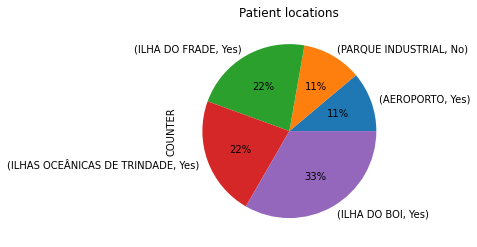

In [99]:
# Pie chart showing the Locations in which patients least showed up for their medical appointments

Pie_chart_plot_3();

This pie chart shows the Locations from which patients least showed up for thier appoitments.

In [50]:
# converting the data type of the ScheduledDay column to date/time

df_patient['ScheduledDay']= pd.to_datetime(df_patient['ScheduledDay'])

In [51]:
#verifying that the data type of the date/time column is correct

df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicaped      110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [179]:
# what day had the highest number of patients that did not show up for their appointments

day_count = df_patient['COUNTER'] =1       
weekday_group = df_patient.groupby(['ScheduledDay','No-show'])['COUNTER'].sum().nlargest()
weekday_group

ScheduledDay               No-show
2016-04-25 17:17:46+00:00  Yes        21
2016-04-25 17:18:27+00:00  Yes        20
2016-04-25 17:17:23+00:00  Yes        16
2016-05-06 07:09:53+00:00  Yes        16
2016-05-06 07:09:54+00:00  Yes        15
Name: COUNTER, dtype: int64

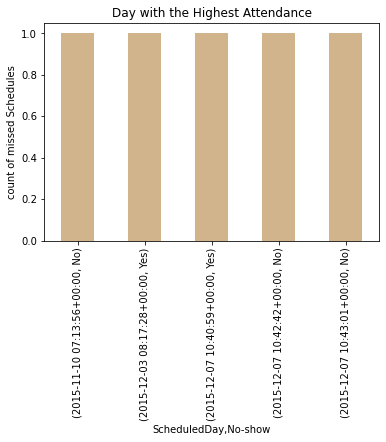

In [291]:
weekday_group.plot(kind = 'bar', color = 'tan', ylabel='count of missed Schedules', title = 'Day with the Highest Attendance');

This  bar chart shows the day of the week with the highest medical appointment attendace.

In [189]:
# what day had the least number of patients that did not show up for their appointments

day_count = df_patient['COUNTER'] =1       
weekday_group_least = df_patient.groupby(['ScheduledDay','No-show'])['COUNTER'].sum().nsmallest()
weekday_group_least

ScheduledDay               No-show
2015-11-10 07:13:56+00:00  No         1
2015-12-03 08:17:28+00:00  Yes        1
2015-12-07 10:40:59+00:00  Yes        1
2015-12-07 10:42:42+00:00  No         1
2015-12-07 10:43:01+00:00  No         1
Name: COUNTER, dtype: int64

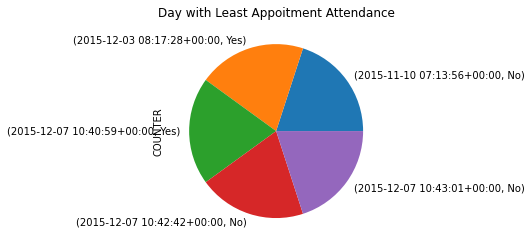

In [194]:
weekday_group_least.plot(kind='pie', title='Day with Least Appoitment Attendance');

This pie chart helps to show what day of the week had the least appoitment attendace.

4. Conclusions: After going through the stages of data analysis for the Patient Medical Record Database, I made the following findings:

1. 99666 patients on Scholarship showed up for their appointment. This shows that a student enrolled in the Brazillian welfer program is likely going to show up for their medical appointment.

2. Being handicapped does not affect whether or not a patient shows up for their appointment as there are a total of 108286 handicapped patients who still showed up accordingly for their appointments.

3. It is important for the Hospital to send out SMS reminders to patients about their appointment days because 68% of patients that recieved SMS notification showed up for their appoitments.

4a. Infancts between ages 0 and 1 showed up the most for their appoitments.

4b. The patients of ages 96-99 showed up the least for their appointments.

5a. From this analysis, it was seen that 31% of Patients from Jardim Cambur Location showed up for their appointment. This is the neighborhood from which the most patients showed up.

5b. It is also seen from this analysis that 11% of the patients that showed up are from Parque Industrial location. The least number of patients showed up from this location.

6a. The most number of missed appoitments happened on 2016-04-25 17:17:46+00:00.

6b. The least number of missed appoitments happened on 2015-12-03 08:17:28+00:00.

# Limitation of the Dataset
In conclusion, this dataset failed to state if the Hospital has just one location or if it has multiple locations. If this infomation was provided, reasonable conclusions will be drawn as to why patients from Jardim Cambur neighborhood showed up the most for their appointments.